# Import Data

For this purpose, this strategy will attemp to trade 3 instruments

1. AUDUSD H4 - Liquid, Low Volatility
1. AUDUSD D1 - Liquid, Low Volatility
1. EURUSD H4 - Liquid, Mid Volatility
1. EURUSD D1 - Liquid, Mid Volatility
1. GBPUSD H4 - Liquid, Extreme Volatility
1. GBPUSD D1 - Liquid, High Volatility
1. Wirdcard D1 - Illiquid, High Volatility

## AUDUSD D1


In [5]:

import pandas as pd
import import_ipynb
from strategy_sv import TradeStrategySV

forex_symbol = "AUDUSD"

forex_df = pd.read_csv('../../data/gen/{}_Daily_df.csv'.format(forex_symbol),
                       parse_dates=True,
                       index_col=0)
# Strip whitespace from column names
forex_df.columns = forex_df.columns.str.strip()

# Trading Parameters
lots = 1 
leverage = 400 # 400 Leverage
margin = 0.1 # 10% Margin Interest
pip_cost = 0.8 # Transaction Cost 0.8 pip
stop_loss = 2.0 # Stop Loss at 2.0 of standard deviation (so 5%)
one_trade_week = 5
one_trade_month = one_trade_week * 4
two_trade_month = one_trade_month * 2
three_trade_month = one_trade_month * 3
half_trade_year = three_trade_month * 2
one_trade_year = half_trade_year * 2
buy_slope_threshold = 0.00011578947368419412 
buy_velocity_threshold = -0.01695000000000002
close_slope_threshold = 0.017273684210526295
close_velocity_threshold = 0.018381578947368395
sell_slope_threshold = -0.00011578947368419412
sell_velocity_threshold = 0.01695000000000002 

# Initialize Strategy
strategy = TradeStrategySV(leverage=leverage,
                           margin=margin,
                           pip_cost=pip_cost,
                           buy_slope_threshold=buy_slope_threshold, 
                           buy_velocity_threshold=buy_velocity_threshold, 
                           close_slope_threshold=close_slope_threshold, 
                           close_velocity_threshold=close_velocity_threshold, 
                           sell_slope_threshold=sell_slope_threshold, 
                           sell_velocity_threshold=sell_velocity_threshold, 
                           should_log = True)
# backtest_df = forex_df[:one_trade_year]
forex_df = strategy.trade(data_df=forex_df, 
                          symbol=forex_symbol,
                          lots=lots,
                          stop_loss=stop_loss,)
test_df = forex_df[-one_trade_year:]
test_df = strategy.trade(data_df=test_df, 
                         symbol=forex_symbol,
                         lots=lots,
                         stop_loss=stop_loss,)

print("In the latest {} trading days, Strategy 4 resulted ${}, or {}%".format(len(test_df.index), round(strategy.trade_profit, 2), round(strategy.trade_profit/(lots * 100000 / leverage), 2)))

# Print
test_df.head()


In the latest 240 trading days, Strategy 4 resulted $61878.94, or 247.52%


,timestamp,open,high,low,close,pre_close,p_change,pip_change,profit,slope,velocity,position
,,,,,,,,,,,,
240,2018-09-10,0.7108,0.7132,0.7096,0.7113,0.7108,0.000703,7.034328,54.343275,0.00050,-5.551115e-17,LONG
239,2018-09-11,0.7113,0.7129,0.7083,0.7118,0.7113,0.000703,7.029383,54.293828,0.00050,1.175000e-03,LONG
238,2018-09-12,0.7118,0.7183,0.7091,0.7170,0.7118,0.007305,73.054229,714.542287,0.00285,1.575000e-03,LONG
237,2018-09-13,0.7170,0.7229,0.7165,0.7191,0.7170,0.002929,29.288703,276.887029,0.00365,-1.925000e-03,LONG
236,2018-09-14,0.7191,0.7216,0.7148,0.7150,0.7191,-0.005702,-57.015714,586.157141,-0.00100,-2.850000e-03,SHORT


# Initialize Strategy 

Let's create a strategy which with the following:

`buy_slope_threshold` = 0.1 # The slope required to trigger BUY
`buy_velocity_threshold` = 0.1 # The velocity required to trigger BUY
`close_slope_threshold` = 0 # The slope required to trigger CLOSE
`close_velocity_threshold` = 0 # The slope required to trigger CLOSE
`sell_slope_threshold` = -0.1 # The slope required to trigger SELL
`sell_velocity_threshold` = -0.1 # The velocity required to trigger SELL


Daily pip Change for AUDUSD since 2001-05-11


count    4999.000000
mean        0.847869
std        77.761391
min      -826.553016
25%       -36.678805
50%         2.551020
75%        41.124728
max       837.606838
Name: pip_change, dtype: float64

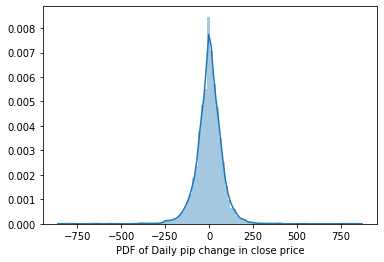

In [6]:
import import_ipynb
from strategy_4 import TradeStrategy4

buy_slope_threshold = 0.05 # The slope required to trigger BUY
buy_velocity_threshold = 0.05 # The velocity required to trigger BUY
close_slope_threshold = 0 # The slope required to trigger CLOSE
close_velocity_threshold = 0 # The slope required to trigger CLOSE
sell_slope_threshold = -0.05 # The slope required to trigger SELL
sell_velocity_threshold = -0.05 # The velocity required to trigger SELL

strategy = TradeStrategy4(buy_slope_threshold=buy_slope_threshold,
                          buy_velocity_threshold=buy_velocity_threshold,
                          close_slope_threshold=close_slope_threshold,
                          close_velocity_threshold=close_velocity_threshold,
                          sell_slope_threshold=sell_slope_threshold,
                          sell_velocity_threshold=sell_velocity_threshold,
                          should_log=True, 
                          should_plot=False)


# Testing Strategy 

We will iterate through all trade days, and let strategy decide whether or not it should buy/sell.

Finally, we will print the strategy of the result.

Slope for AUDUSD since 2001-05-11


count    4999.000000
mean        0.000033
std         0.004217
min        -0.034200
25%        -0.002000
50%         0.000200
75%         0.002350
max         0.031000
Name: slope, dtype: float64

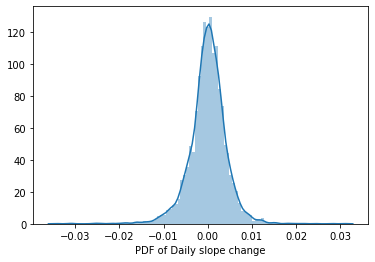

In [7]:
for date, trade_day in extra_df.iterrows():
    strategy.trade(date=date,
                   tradeday=trade_day)
print("Strategy4 Yielded: {}% with: buy_slope_threshold {}, buy_velocity_threshold {}, close_slope_threshold {}, close_velocity_threshold {}, sell_slope_threshold {}, sell_velocity_threshold {}, .".format(round(strategy.trade_profit*100, 2), buy_slope_threshold, buy_velocity_threshold, close_slope_threshold, close_velocity_threshold, sell_slope_threshold, sell_velocity_threshold))


Velocity for AUDUSD since 2001-05-11


count    4.999000e+03
mean    -4.850970e-07
std      3.020586e-03
min     -1.695000e-02
25%     -1.625000e-03
50%      2.775558e-17
75%      1.600000e-03
max      3.260000e-02
Name: velocity, dtype: float64

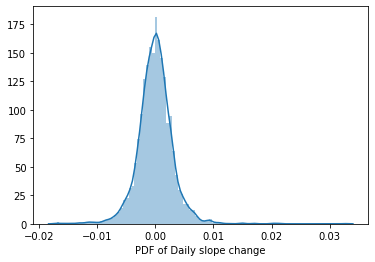

In [9]:
        
backtest_result = backtest_result.sort_values(by=['profit_percentage'],
                                        ascending=False)
backtest_result.head(100)


In [10]:

margin_interest = 0.1 # Assuming Margin interest is 10% per year
leverage = 400 # Assuming Trading with Leverage

test_df = extra_df[-504:] # We use all available data until 2 years ago
test_params = backtest_result.iloc[:100]

test_list = list(zip(test_params.buy_slope_threshold, 
                    test_params.buy_velocity_threshold,
                    test_params.close_slope_threshold, 
                    test_params.close_velocity_threshold,
                    test_params.sell_slope_threshold, 
                    test_params.sell_velocity_threshold,))

print("Params Ready, {} tasks to run. ".format(len(test_list)))
    

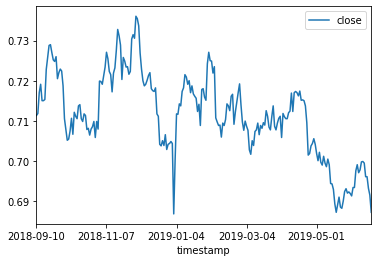

In [15]:

test_df.plot(x="timestamp", 
             y="close")


In [13]:

#### Plot Trade with Candlesticks Chart


Plotting 240 results for trade days
HOLD 2018-09-11
HOLD 2018-09-12
HOLD 2018-09-13
SHORT 2018-09-10 - 2018-09-14, Profit: $586.16 (57.0 pips)
HOLD 2018-09-16
LONG 2018-09-14 - 2018-09-17, Profit: $25.96 (4.2 pips)
HOLD 2018-09-18
HOLD 2018-09-19
HOLD 2018-09-20
HOLD 2018-09-21
SHORT 2018-09-17 - 2018-09-23, Profit: $290.35 (27.4 pips)
HOLD 2018-09-24
HOLD 2018-09-25
LONG 2018-09-23 - 2018-09-26, Profit: $149.56 (16.6 pips)
SHORT 2018-09-26 - 2018-09-27, Profit: $773.58 (75.8 pips)
HOLD 2018-09-28
LONG 2018-09-27 - 2018-09-30, Profit: $108.65 (12.5 pips)
HOLD 2018-10-01
SHORT 2018-09-30 - 2018-10-02, Profit: $528.18 (51.2 pips)
HOLD 2018-10-03
HOLD 2018-10-04
HOLD 2018-10-05
HOLD 2018-10-07
LONG 2018-10-02 - 2018-10-08, Profit: $267.53 (28.4 pips)
HOLD 2018-10-09
SHORT 2018-10-08 - 2018-10-10, Profit: $578.9 (56.3 pips)
LONG 2018-10-10 - 2018-10-11, Profit: $762.38 (77.8 pips)
HOLD 2018-10-12
SHORT 2018-10-11 - 2018-10-14, Profit: $100.38 (8.4 pips)
LONG 2018-10-14 - 2018-10-15, Profit

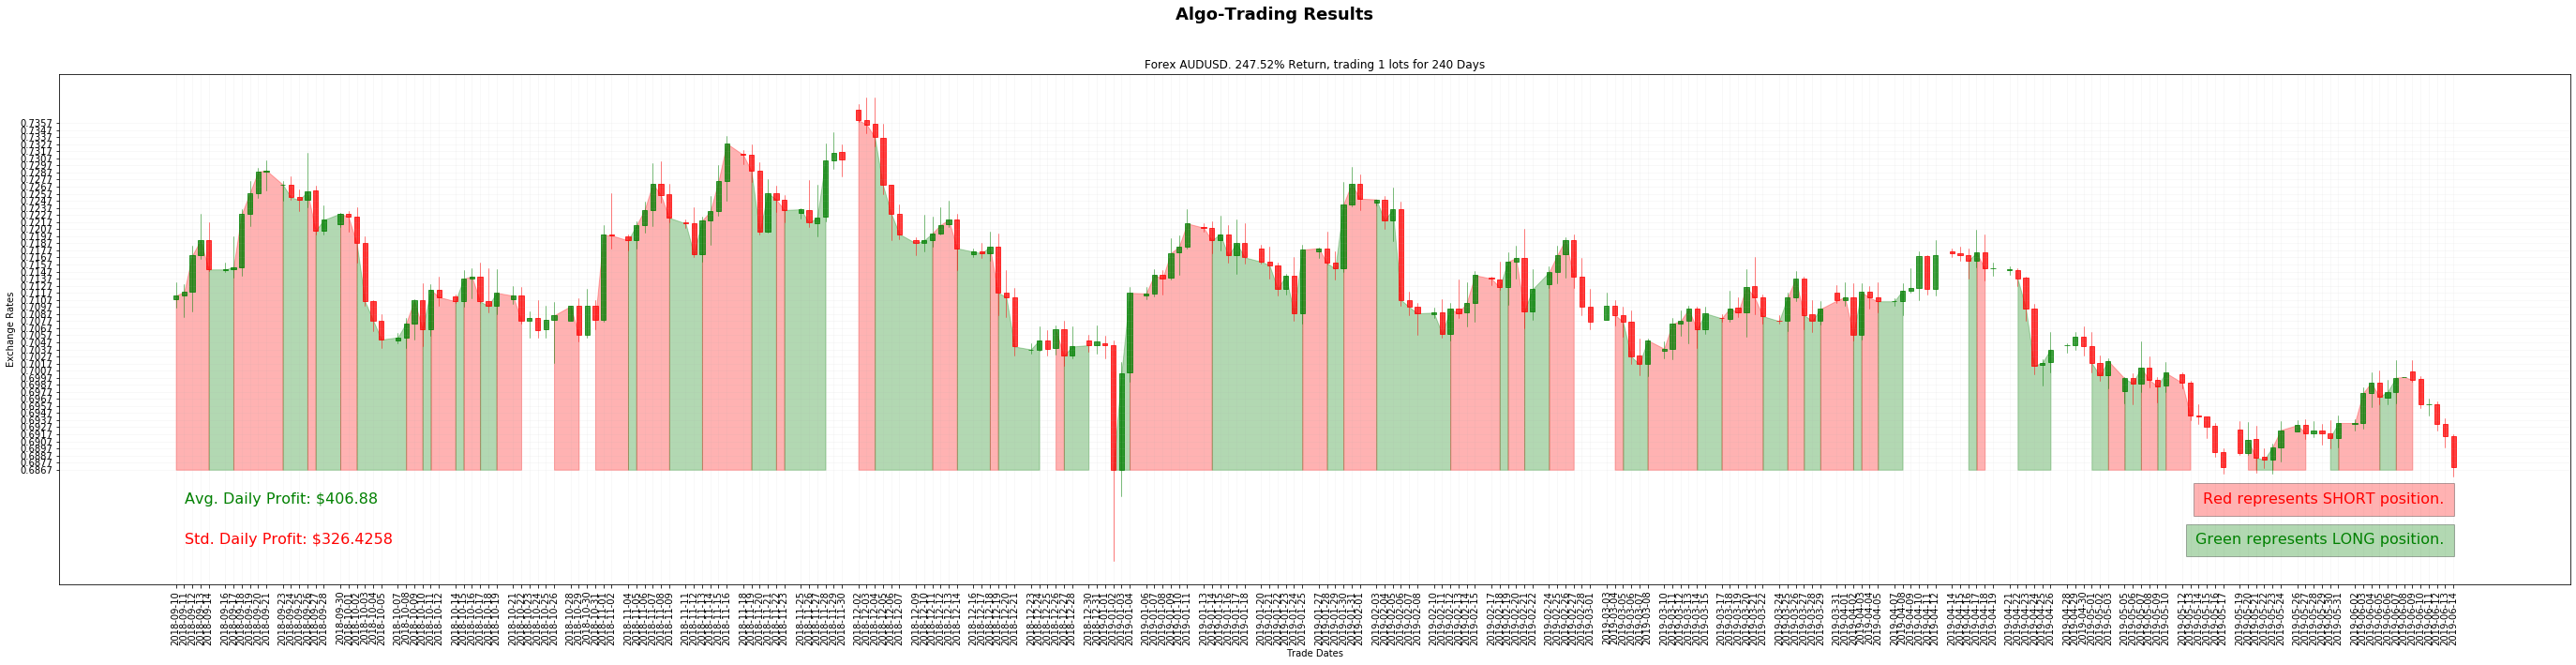

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize = (int(len(test_df.index)/5),10))

fig.suptitle('Algo-Trading Results', fontsize=18, fontweight='bold')
strategy.plot_trade(axs=axs)

fig.savefig('../gen/StrategySV_{}_Daily.png'.format(forex_symbol), dpi=150, bbox_inches="tight")